# PROJECT - DOG BREED IDENTIFICATION USING CNN 

## Mounica Subramani

Convolutional Neural Networks are a form of Feedforward Neural Networks.
- The first part consists of Convolutional and max-pooling layers which act as the feature extractor. 
- The second part consists of the fully connected layer which performs non-linear transformations of the extracted features and acts as the classifier.

The Kaggle dataset - Stanford Dog Dataset -This contains training folder with 120 folders corresponding to the 120 breeds and images of the corresponding dog breed inside and a testing folder structured in a the same manner.

The classification accuracy is 53.70 %

## Importing Python Libraries

In [1]:
from sklearn.datasets import load_files
import numpy as np
from keras.utils import np_utils
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop

C:\Users\mouni\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Defining constants

CNNData in the git contains the complete data set. The sample folder contains the data to be used in the code.

In [2]:
#Load dataset

from sklearn.datasets import load_files
import numpy as np

train_dir = 'sample/train'
test_dir = 'sample/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  600
Testing set size :  540


The code below works with 6 sample classes out of total 120.

In [3]:
# Confirm the number of classes 
no_of_classes = len(np.unique(y_train))
no_of_classes

6

In [4]:
print(y_train[0:10])
# Target labels are numbers corresponding to class label. We need to change them to a vector of 81 elements.

[4 1 2 4 2 5 4 5 4 1]


In [5]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] 
# Note that only one element has value 1(corresponding to its label) and others are 0.

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [6]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[270:],x_test[:270]
y_test,y_vaild = y_test[270:],y_test[:270]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (270,)
Vaildation y : (270, 6)
Test X :  (270,)
Test y :  (270, 6)


In [7]:
x_train[0]
# training data is just file names of images. We need to convert them into pixel matrix.

'sample/train\\n02086240-Shih-Tzu\\n02086240_3175.jpg'

### Converting Image to Array

In [8]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (600, 224, 224, 3)
Validation set shape :  (270, 224, 224, 3)
Test set shape :  (270, 224, 224, 3)
1st training image shape  (224, 224, 3)


In [9]:
print('1st training image as array',x_train[0]) 

1st training image as array [[[ 39.  39.  39.]
  [ 39.  39.  39.]
  [ 41.  41.  41.]
  ...
  [183. 183. 183.]
  [184. 184. 184.]
  [185. 185. 185.]]

 [[ 43.  43.  43.]
  [ 44.  44.  44.]
  [ 45.  45.  45.]
  ...
  [193. 193. 193.]
  [191. 191. 191.]
  [190. 190. 190.]]

 [[ 37.  37.  37.]
  [ 43.  43.  43.]
  [ 48.  48.  48.]
  ...
  [182. 182. 182.]
  [180. 180. 180.]
  [178. 178. 178.]]

 ...

 [[159. 159. 159.]
  [158. 158. 158.]
  [158. 158. 158.]
  ...
  [150. 150. 150.]
  [148. 148. 148.]
  [145. 145. 145.]]

 [[159. 159. 159.]
  [159. 159. 159.]
  [159. 159. 159.]
  ...
  [156. 156. 156.]
  [154. 154. 154.]
  [150. 150. 150.]]

 [[160. 160. 160.]
  [161. 161. 161.]
  [161. 161. 161.]
  ...
  [165. 165. 165.]
  [168. 168. 168.]
  [168. 168. 168.]]]


In [10]:
# re-scale so that all the pixel values lie within 0 to 1
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[0.15294118, 0.15294118, 0.15294118],
        [0.15294118, 0.15294118, 0.15294118],
        [0.16078432, 0.16078432, 0.16078432],
        ...,
        [0.7176471 , 0.7176471 , 0.7176471 ],
        [0.72156864, 0.72156864, 0.72156864],
        [0.7254902 , 0.7254902 , 0.7254902 ]],

       [[0.16862746, 0.16862746, 0.16862746],
        [0.17254902, 0.17254902, 0.17254902],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        ...,
        [0.75686276, 0.75686276, 0.75686276],
        [0.7490196 , 0.7490196 , 0.7490196 ],
        [0.74509805, 0.74509805, 0.74509805]],

       [[0.14509805, 0.14509805, 0.14509805],
        [0.16862746, 0.16862746, 0.16862746],
        [0.1882353 , 0.1882353 , 0.1882353 ],
        ...,
        [0.7137255 , 0.7137255 , 0.7137255 ],
        [0.7058824 , 0.7058824 , 0.7058824 ],
        [0.69803923, 0.69803923, 0.69803923]],

       ...,

       [[0.62352943, 0.62352943, 0.62352943],
        [0.61960787, 0.61960787, 0.61960787],
        [0.61960787, 0

### Visualizing training images

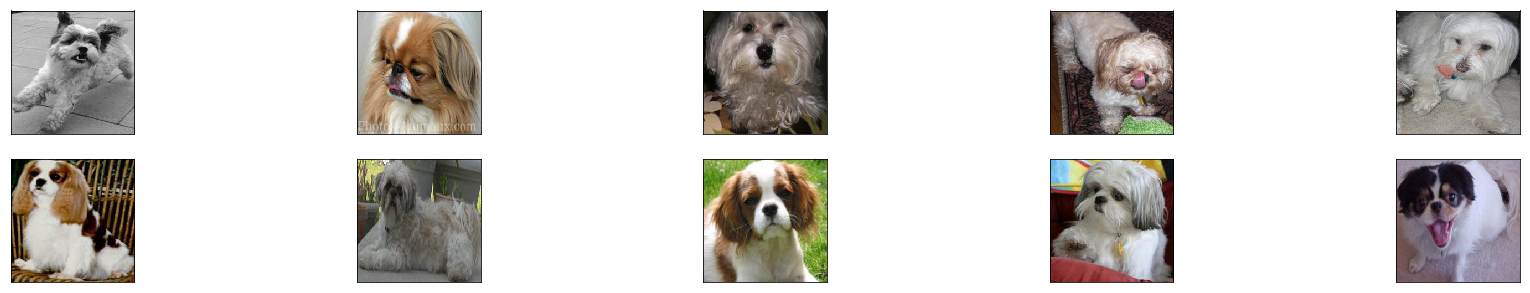

In [11]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### Implementing Basic CNN Model

- For implementing a CNN, we stack up Convolutional Layers, followed by Max Pooling layers. We also include Dropout to avoid overfitting. Finally, we add a fully connected ( Dense ) layer followed by a softmax layer. 

- Here, we use 4 convolutional layers and 1 fully-connected layer. We using 16, 32, 64 and 128 filters respectively. We add a dropout layer with a dropout ratio of 0.3 to avoid over-fitting.

In [12]:
#Simple CNN from scratch - we are using 4 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

def createModel():
    model = Sequential()
    model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(224,224,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(150))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(6,activation = 'softmax'))
    model.summary()
    
    return model



### Training the Model

- We use a categorical cross entropy loss and RMSProp optimizer to train the network.

The below code is for grid search method to select hyper parameters for tuning. But the parameters actually used in the model are selected based on trial and error method.

In [1]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import make_scorer
# mk_scoring = {'accuracy': make_scorer(accuracy_score)}
# #            ,               'prec': 'precision'}


# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [10, 50, 100]
# weight_constraint = [1, 2, 3, 4, 5]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, learn_rate=learn_rate, momentum=momentum, 
                  init_mode=init_mode, activation=activation, dropout_rate=dropout_rate, weight_constraint=weight_constraint)


grid = GridSearchCV(estimator=model, param_grid=param_grid, refit='accuracy', scoring=mk_scoring, n_jobs=-1, cv=5)

In [ ]:
grid_result = grid.fit(x_train, y_train)

In [ ]:
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [13]:
model = createModel()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
__________

- Batch size refers to the number of training examples utilised in one iteration. Thus, here we have used 32 training examples in one iteration
- Epoch: An epoch indicates the number of passes through the entire training dataset the machine learning algorithm has completed. We have used 5 epochs here.

In [15]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 600 samples, validate on 270 samples
Epoch 1/10
 - 31s - loss: 1.2895 - acc: 0.5050 - val_loss: 1.8006 - val_acc: 0.2630

Epoch 00001: val_loss improved from inf to 1.80062, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/10
 - 33s - loss: 1.1744 - acc: 0.5833 - val_loss: 1.4917 - val_acc: 0.3852

Epoch 00002: val_loss improved from 1.80062 to 1.49173, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/10
 - 31s - loss: 1.0580 - acc: 0.6067 - val_loss: 1.2613 - val_acc: 0.5333

Epoch 00003: val_loss improved from 1.49173 to 1.26128, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/10
 - 31s - loss: 0.8764 - acc: 0.6717 - val_loss: 1.4535 - val_acc: 0.4556

Epoch 00004: val_loss did not improve from 1.26128
Epoch 5/10
 - 32s - loss: 0.8096 - acc: 0.7083 - val_loss: 1.4146 - val_acc: 0.4963

Epoch 00005: val_loss did not improve from 1.26128
Epoch 6/10
 - 32s - loss: 0.6543 - acc: 0.7717 - val_loss: 1.6547 - val_acc: 0.4370

Epoch 00006: val_loss did not improve from 

In [16]:
# load the weights that yielded the best validation accuracy
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [17]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5370370383615847


### Visualizing Predicted Values

- We visualize the test prediction. Here, we can see all the dogs labeled correctly. The one with red labels are wrongly predicted and one with green labels are correctly predicted.

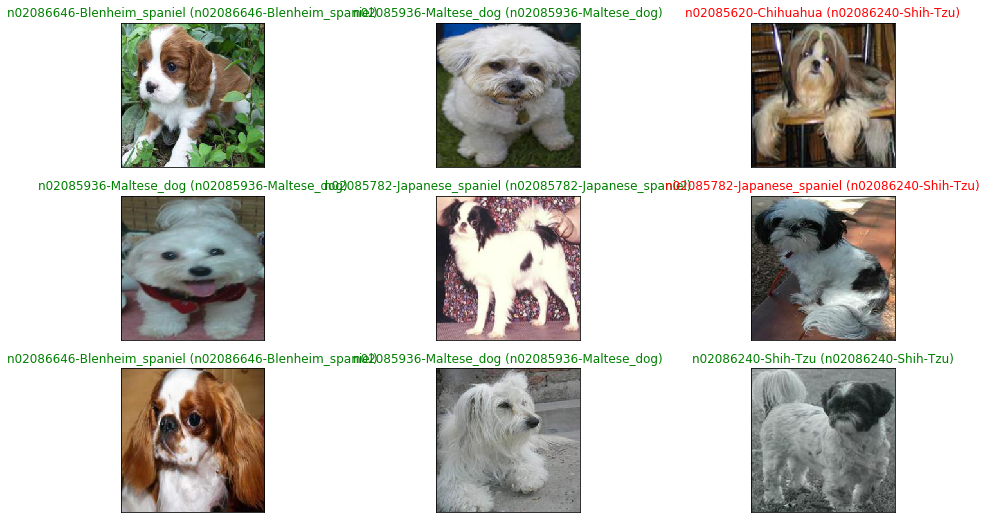

In [18]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### Visualizing Model Loss & Accuracy

- Finally, we visualize the loss and accuracy with respect to epochs
- From the below curves, we can see that there is a considerable difference between the training and validation loss. This indicates that the network has tried to memorize the training data and thus, is able to get better accuracy on it. This could be a sign of Overfitting. Inspite of using Dropout in the network, we still have overfitting. 
- We can further reduce overfitting using DATA AUGMENTATION.

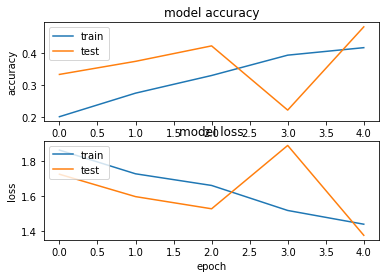

In [68]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# DATA AUGMENTATION

- One of the major reasons for overfitting is that you don’t have enough data to train your network. 
- Apart from regularization, another very effective way to counter Overfitting is Data Augmentation. It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image. 
- We use ImageDataGenerator instance in Keras.

- We have provided some of the operations that can be done using the ImageDataGenerator for data augmentation. This includes 
    - rotation of the image
    - shifting the image left/right/top/bottom by some amount
    - flip the image horizontally or vertically
    - shear the image 
    - zoom the image 

In [69]:
from keras.preprocessing.image import ImageDataGenerator
 
ImageDataGenerator(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

### Creating Model and Training with Augmented Data

- We create the model, but use data augmentation while training. We use ImageDataGenerator for creating a generator which feeds the network.

- Here, we achieve an accuracy of 98.2 %

In [70]:
from keras.preprocessing.image import ImageDataGenerator
 
#create the model and configure it
model2 = createModel()
 
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 32
epochs = 5
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
 
# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              workers=4)
 
model2.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
activation_13 (Activation)   (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 28, 28, 64)        0         
__________

[1.578995653435036, 0.3703703710326442]

### Loss & Accuracy Curves

- From the below curves, we see that the test accuracy is greater than training accuracy. This means that the model has generalized very well. This comes from the fact that the model has been trained on much worse data ( for example – flipped images), so it is finding the normal test data easier to classify.

Text(0.5,1,'Accuracy Curves')

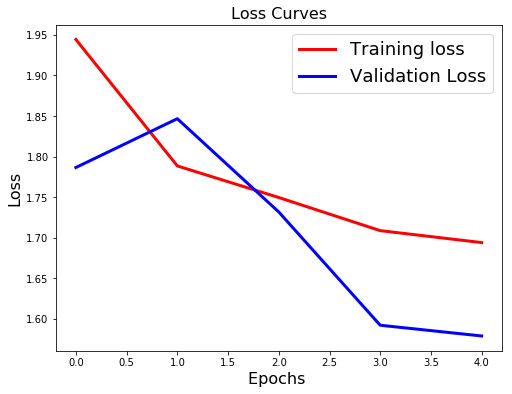

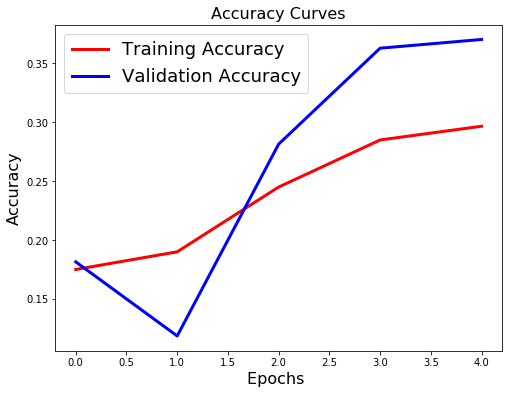

In [72]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Citations

- https://www.kaggle.com/aninditapani/cnn-from-scratch-with-98-accuracy
- https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/
- https://github.com/fchollet/keras/blob/master/examples
- https://en.wikipedia.org/wiki/Generative_adversarial_network
- https://medium.com/@keisukeumezawa/dcgan-generate-the-images-with-deep-convolutinal-gan-55edf947c34b